Name : Samita Ghale
Student NO.: 220257879

#### question -1

 COSC102 Assignment 1 Part 1- Predator vs Prey Population Dynamics

In nature, the populations of predators and prey species are often strongly linked.
As the population of the predators increases, the population of prey decreases (due to increased predation).
Likewise, as the population of prey decreases, the population of the predators decreases (due to scarcity of prey). 
This basic relationship can be modelled using a simplified set of differential equations.
In this assessment you will implement a simple model that captures the population dynamics
between **Fox** and **Rabbit** populations. 

First let's make some assumptions:
* The only food for foxes is rabbits.
* There is unlimited growth for both populations
* This is a closed system - foxes and rabbits are not added and subtracted due to outside influences.


In [2]:
import matplotlib.pyplot as plt 
initial_fox_population = 35000 #foxes
initial_rabbit_population = 70000 # rabbit

# constant
# all constant values that represent the reproduction and predation rates
c= 0.000005
d= 0.3
f= 0.5
g= 0.00001

In [3]:
#  reusable function that calculate the  populations of foxes and rabbits for the next time step given,
#  the populations for the current time step (xt, yt).
def calculate_foxes(xt, yt, c, d):
    return (((c*yt)-d)*xt)+xt
def calculate_rabbits(xt, yt, f, g):
    return ((f-(g*xt))*yt)+yt


In [4]:
fox_population = [initial_x_population]
rabbit_population = [initial_y_population]

In [5]:
xt = initial_x_population
yt = initial_y_population
# iterative structure to calculate the populations for the time steps 1 ... 20.
for i in range(20-1):
    xt1 = calculate_foxes(xt,yt,c,d)
    yt1 = calculate_rabbits(xt, yt, f, g)
    fox_population.append(xt1)
    rabbit_population.append(yt1)
    xt = xt1
    yt = yt1


 Plotting the result 

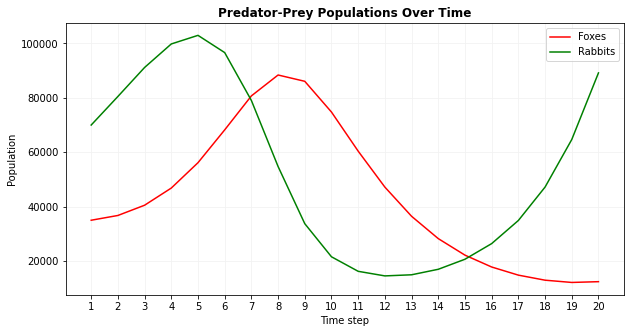

In [63]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
x_ticks = range(1,len(fox_population)+1)
plt.plot(x_ticks, fox_population, 'r')
plt.plot(x_ticks, rabbit_population,'g',)
plt.xticks(x_ticks)
plt.title("Predator-Prey Populations Over Time",fontweight="bold")
plt.ylabel("Population")
plt.xlabel("Time step")
plt.legend(['Foxes', 'Rabbits'])
plt.grid(color='0.95')
plt.show()

In [65]:
# save figure
fig.savefig('predator-prey_population.png')

#### Question -2

 "You should include a description of your program in this block.

In [5]:
# additional libraries
import random
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [9]:
def trails_data_generator(trials, no_of_trails, n):
    for t in range(no_of_trails):
        for exp in range(n):
            r= random.random()
            if r>0.5:
                trials[t]+=1
            else:
                trials[t]-=1
    return trials
def plot_hist(trials):
    plt.hist(trials)
    plt.show()
def create_line_plot_kde(n, no_of_trials, trials):
    x_d = np.linspace(-n, n, no_of_trials)
    # instantiate and fit the KDE model
    kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
    kde.fit(trials[:, None])
    # score_samples returns the log of the probability density
    logprob = kde.score_samples(x_d[:, None])
    plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
    plt.plot(trials, np.full_like(trials, -0.01), '|k', markeredgewidth=1)
    plt.ylim(-0.02, 0.22)

In [12]:
def Binomial_distribution(no_of_trials, n, p):
    trials = np.zeros(no_of_trials)
    trials = trails_data_generator(trials , no_of_trials, n)
    plot_hist(trials)
    create_line_plot_kde(n, no_of_trials, trials)

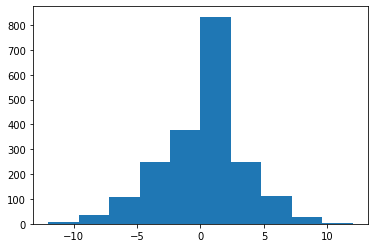

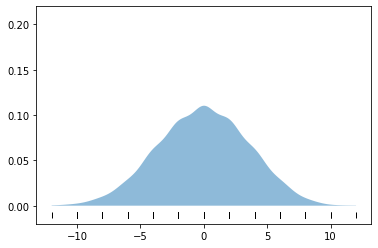

In [13]:
no_of_trails = 2000
n =12
p =0.5
Binomial_distribution(no_of_trails, n, p)

1. What is the effect on the resulting distribution of modifying the value of n - the number of experiments?

> The effect on the resulting distribution of modifying the value of n is the histogram begins to disconnect and density begins to flat and large while decreasing the value of n and vice versa.

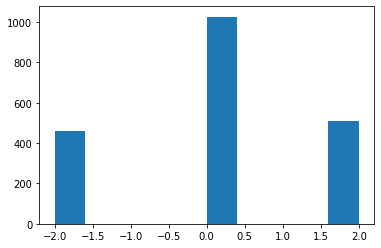

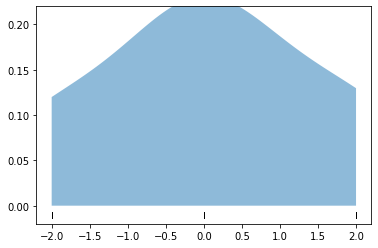

In [14]:
no_of_trails = 2000
n =2
p =0.5
Binomial_distribution(no_of_trails, n, p)

2. What is the effect on the resulting distribution of modifying the value of p - the probability of a positive resulting in the experiment?

> on Increasing the probability of a positive resulting, the histogram lean towards negative values and While Decreasing the probability of positive resulting , the experiment lean towards positive values. But the density doesnot seem soo much deflects as it is deflected when we change the n.

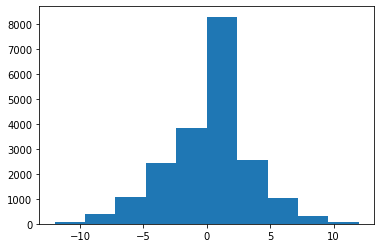

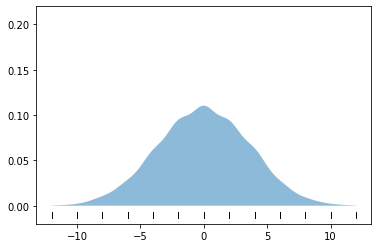

In [22]:
no_of_trails = 20000
n =12
p =0.9
Binomial_distribution(no_of_trails, n, p)